## Introduction

Lyft operates in a competitive ride-sharing market where service quality and customer satisfaction are paramount. The company's ability to maintain a robust and efficient transportation service hinges on the performance of its extensive network of drivers. Therefore, a systematic analysis of driver data is vital to discern patterns, understand behaviors, and tailor strategies that enhance service delivery.

## Problem Statement and Importance

The central challenge addressed in this analysis is the categorization of Lyft drivers into distinct clusters based on performance metrics. This segmentation is instrumental for several reasons:

- **Service Quality Enhancement**: By identifying and understanding the characteristics of top performers, Lyft can set benchmarks and encourage best practices across its driver community.
- **Driver Retention Optimization**: Insights into performance factors enable Lyft to nurture a supportive environment that values and sustains successful drivers.
- **Operational Efficiencies**: Clustering drivers by performance can reveal opportunities to streamline operations, allocate resources effectively, and reduce unnecessary expenditures.

## Methodology

The methodology adopted for this analysis encapsulates an end-to-end data analytical process, including:

1. **Data Preprocessing**: This foundational step involves cleaning the massive datasets to remove inconsistencies and ensure data quality and usability.
2. **Feature Engineering**: We extract and create new indicators that effectively represent the drivers' performance dynamics, allowing for a more nuanced analysis.
3. **Exploratory Data Analysis (EDA)**: Through EDA, we delve into the dataset to uncover trends, detect anomalies, and understand variable interrelationships.
4. **Clustering Technique Implementation**: Leveraging the k-means algorithm, we segment the driver data into clusters, each representing a group with shared performance attributes.

This robust analytical framework is structured to equip Lyft with in-depth knowledge of its drivers, fostering an environment of continuous improvement and strategic development in its service offerings.

## 1. Data Preprocessing

In [1]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

# Increase maximum displayed columns
pd.set_option("display.max_columns", 50)

In [3]:
# Load the data
ride_timestamps = pd.read_csv('../input/lyftdatachallenge/ride_timestamps.csv', parse_dates=['timestamp'])
driver_ids = pd.read_csv('../input/lyftdatachallenge/driver_ids.csv', parse_dates=['driver_onboard_date'])
ride_ids = pd.read_csv('../input/lyftdatachallenge/ride_ids.csv')

In [4]:
# Display the first few rows
ride_timestamps.head(3)

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31


In [5]:
# Display information about `ride_timestamps`
ride_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ride_id    970405 non-null  object        
 1   event      970405 non-null  object        
 2   timestamp  970404 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 22.2+ MB


In [6]:
# Display descriptive statistics
ride_timestamps.describe().T

,count,mean,min,25%,50%,75%,max
timestamp,970404,2016-05-21 01:21:01.782787072,2016-03-28 05:48:18,2016-05-04 18:20:46.500,2016-05-21 14:58:25.500,2016-06-08 18:58:09,2016-06-27 00:50:50


In [7]:
# Print the number of unique rides in the DataFrame
print(f"- There are {ride_timestamps.ride_id.nunique()} unique rides in the DataFrame.")

# Print the date of the first and last ride
print(f"- The first ride was on {ride_timestamps.timestamp.min()}.")
print(f"- The last ride was on {ride_timestamps.timestamp.max()}.")

- There are 194081 unique rides in the DataFrame.
- The first ride was on 2016-03-28 05:48:18.
- The last ride was on 2016-06-27 00:50:50.


In [8]:
# Display the first few rows
driver_ids.head(3)

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29
1,007f0389f9c7b03ef97098422f902e62,2016-03-29
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05


In [9]:
# Display informations about `driver_ids`
driver_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   driver_id            937 non-null    object        
 1   driver_onboard_date  937 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 14.8+ KB


In [10]:
# Display descriptive statistics
driver_ids.describe().T

,count,mean,min,25%,50%,75%,max
driver_onboard_date,937,2016-04-19 07:57:57.054428928,2016-03-28,2016-04-07,2016-04-19,2016-05-01,2016-05-15


In [11]:
# Print the number of duplicates in driver_ids
print(f"- There are {driver_ids.driver_id.nunique()} unique driver in the DataFrame.")

# Print the date of the first and last onboarding driver
print(f"- The first onboarding date was {(driver_ids.driver_onboard_date.min()).date()}.")
print(f"- The last onboarding date was {driver_ids.driver_onboard_date.max().date()}.")

- There are 937 unique driver in the DataFrame.
- The first onboarding date was 2016-03-28.
- The last onboarding date was 2016-05-15.


In [12]:
# Display the first few rows
ride_ids.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0


In [13]:
# Display informations about `ride_ids`
ride_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   driver_id        193502 non-null  object
 1   ride_id          193502 non-null  object
 2   ride_distance    193502 non-null  int64 
 3   ride_duration    193502 non-null  int64 
 4   ride_prime_time  193502 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


In [14]:
# Display descriptive statistics
ride_ids.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ride_distance,193502.0,6955.22,8929.44,-2.0,2459.0,4015.0,7193.0,724679.0
ride_duration,193502.0,858.97,571.38,2.0,491.0,727.0,1069.0,28204.0
ride_prime_time,193502.0,17.31,30.83,0.0,0.0,0.0,25.0,500.0


There is a negative value in `ride_distance` column which seems to be anomalous.

In [15]:
# Select rows with non-positive ride distances
ride_ids[ride_ids['ride_distance'] <= 0].head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
3557,04d686ef2fba281e395992a28f14fdd3,c819e844b0c043786f1291e466478ca0,0,127,0
4221,0656192a402808805282e60761bda088,2f4fe99f74f1d71fdf2e8e18da9670c0,0,404,25
5120,07dd442e3e0b9f0f9b0d69c7b47cbb06,ad2b44316299477f2d6537922af22bf4,0,7,0


In [16]:
# Drop rows with non-positive ride distances
ride_ids = ride_ids.drop(ride_ids[ride_ids['ride_distance'] <= 0].index)

In instances where the ride_distance is recorded as zero despite a positive ride duration, such entries will be considered invalid. Therefore, I'll proceed to remove all entries with zero or negative values in ride distance from the dataset.

## 2. Feature Engineering

### 2.1 Ride Features

$$
\text{Total Ride Cost} = \left(1 + \text{Prime Time Surcharge Percentage}\right) \times
                   \left(\text{Base Fare} + \left(\text{Cost Per Mile} \times \text{Ride Distance in Miles}\right) +
                    \left(\text{Cost Per Minute} \times \text{Ride Duration in Minutes}\right)\right) + \text{Service Fee}
$$

In [17]:
# Define constants
BASE_FARE = 2.00
COST_PER_MILE = 1.15
COST_PER_MIN = 0.22
SERVICE_FEE = 1.75
MIN_FARE = 5.00
MAX_FARE = 400.00

In [18]:
# Calculate the total cost of each ride while onverting ride distance to miles and ride duration to minutes
total_ride_cost = ((1 + ride_ids['ride_prime_time'] / 100) *
                   (BASE_FARE + (COST_PER_MILE * (ride_ids['ride_distance'] * 0.000621)) +
                    (COST_PER_MIN * (ride_ids['ride_duration'] / 60))) + SERVICE_FEE)

# Restrict the total cost within the specified range
ride_ids['ride_total_cost'] = total_ride_cost.clip(lower=MIN_FARE, upper=MAX_FARE)

# Display summary statistics
ride_ids['ride_total_cost'].describe().round(2)

count    193315.00
mean         13.54
std           9.88
min           5.00
25%           8.04
50%          10.57
75%          15.12
max         400.00
Name: ride_total_cost, dtype: float64

In [19]:
# Creating ride events dataframe
ride_events = ride_timestamps.pivot(index='ride_id', values='timestamp', columns='event')

# Display the first few rows
ride_events.head(3)

event,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
ride_id,,,,,
00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09


In [20]:
# Merging ride_ids with ride_events
ride_df = pd.merge(ride_ids, ride_events, on='ride_id')

# Display the first few rows
ride_df.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,8.488488,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.117306,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.191174,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31


In [21]:
# Check for missing values
print(f"There are {ride_df.isna().sum().sum()} missing values in 'ride_df'")

There are 1 missing values in 'ride_df'


In [22]:
# Drop missing values
ride_df.dropna(inplace=True)

In [23]:
# Convert 'ride_distance' to kilometers
ride_df["ride_distance"] = ride_df["ride_distance"] / 1000

# Convert 'ride_duration' to minutes
ride_df["ride_duration"] = ride_df["ride_duration"] / 60

# Calculate the time taken for a driver to respond in minutes
ride_df['driver_response_time'] = (ride_df['accepted_at'] - ride_df['requested_at']).dt.total_seconds() / 60

# Calculate the time taken for the driver to travel to the pickup location in minutes
ride_df['driver_travel_to_pickup_time'] = ((ride_df['arrived_at'] - ride_df['accepted_at']).dt.total_seconds()) / 60

# Calculate the waiting time at the pickup location in minutes
ride_df['pickup_wait_time'] = (ride_df['picked_up_at'] - ride_df['arrived_at']).dt.total_seconds() / 60

# Calculate average speed
ride_df['avg_ride_speed'] = (ride_df['ride_distance']) / (ride_df['ride_duration'] / 60)

# Convert 'accepted_at' to datetime and extract date
ride_df['ride_date'] = pd.to_datetime(ride_df['accepted_at']).dt.date

# Display the first few rows
ride_df.head(3)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,driver_response_time,driver_travel_to_pickup_time,pickup_wait_time,avg_ride_speed,ride_date
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1.811,5.450000,50,8.488488,2016-04-23 02:14:15,2016-04-23 02:16:36,2016-04-23 02:22:07,2016-04-23 02:16:40,2016-04-23 02:13:50,0.416667,2.350000,0.066667,19.937615,2016-04-23
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3.362,13.483333,0,9.117306,2016-03-29 19:00:52,2016-03-29 19:03:57,2016-03-29 19:17:30,2016-03-29 19:04:01,2016-03-29 19:00:49,0.050000,3.083333,0.066667,14.960692,2016-03-29
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3.282,9.533333,0,8.191174,2016-06-21 11:56:39,2016-06-21 12:01:32,2016-06-21 12:11:07,2016-06-21 12:01:35,2016-06-21 11:56:31,0.133333,4.883333,0.050000,20.655944,2016-06-21


In [24]:
# Display descriptive statistics
ride_df.describe().round(2)

,ride_distance,ride_duration,ride_prime_time,ride_total_cost,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at,driver_response_time,driver_travel_to_pickup_time,pickup_wait_time,avg_ride_speed
count,184638.00,184638.00,184638.00,184638.00,184638,184638,184638,184638,184638,184638.00,184638.00,184638.00,184638.00
mean,6.95,14.34,17.39,13.54,2016-05-21 09:19:05.362644736,2016-05-21 09:23:11.267843072,2016-05-21 09:37:36.968402944,2016-05-21 09:23:16.598695680,2016-05-21 09:18:53.709469184,0.19,4.10,0.09,25.36
min,0.00,0.03,0.00,5.00,2016-03-28 05:48:23,2016-03-28 06:02:36,2016-03-28 06:37:51,2016-03-28 06:02:39,2016-03-28 05:48:18,0.00,0.05,-57.93,0.00
25%,2.46,8.20,0.00,8.04,2016-05-05 06:06:37.500000,2016-05-05 06:09:38.500000,2016-05-05 06:21:13.249999872,2016-05-05 06:09:40.249999872,2016-05-05 06:06:31,0.08,2.08,0.02,15.99
50%,4.01,12.13,0.00,10.57,2016-05-21 21:55:12.500000,2016-05-21 21:58:56,2016-05-21 22:11:34.500000,2016-05-21 21:58:58,2016-05-21 21:54:47.500000,0.10,3.33,0.05,20.52
75%,7.17,17.83,25.00,15.11,2016-06-09 06:31:28.750000128,2016-06-09 06:35:43,2016-06-09 06:49:26.750000128,2016-06-09 06:35:46,2016-06-09 06:31:21,0.15,5.20,0.07,28.83
max,724.68,470.07,500.00,400.00,2016-06-26 23:57:49,2016-06-27 00:02:03,2016-06-27 00:50:50,2016-06-27 00:02:06,2016-06-26 23:57:45,83.80,699.43,13.85,147.60
std,8.93,9.54,30.85,9.89,NaN,NaN,NaN,NaN,NaN,0.61,3.62,0.56,14.88


In [25]:
# Count the number of rows with negative pickup wait times
negative_wait_times = ride_df[ride_df['pickup_wait_time'] < 0]
num_negative_wait_times = len(negative_wait_times)

# Print the number of rows with negative pickup wait times
print(f"There are {num_negative_wait_times} rows that have a negative pickup wait time.")

There are 8004 rows that have a negative pickup wait time.


In [26]:
# Drop rows with negative pickup wait times
ride_df = ride_df[ride_df['pickup_wait_time'] >= 0]

### 2.2 Driver Features

In [27]:
# Calculate driver per day ride count
driver_perday_ridecount = ride_df.pivot_table(index='driver_id', columns='ride_date', aggfunc='size').fillna(0)

# Create a DataFrame to store aggregated driver information
driver_info = pd.DataFrame({
    'total_ride_count': ride_df.groupby('driver_id').size(),
    'total_distance': ride_df.groupby('driver_id')['ride_distance'].sum(),
    'total_duration': ride_df.groupby('driver_id')['ride_duration'].sum(),
    'total_earnings': ride_df.groupby('driver_id')['ride_total_cost'].sum()
})

# Calculate mean per day ride count for each driver
#driver_info['avg_daily_ride_count'] = driver_perday_ridecount.mean(axis=1)

# Define aggregation functions
aggregation_functions = {
    'driver_response_time': 'mean',
    'driver_travel_to_pickup_time': 'mean',
    'pickup_wait_time': 'mean',
    'avg_ride_speed': 'mean',
    'ride_distance': 'mean',
    'ride_prime_time': 'mean'
}

# Aggregate using the defined functions and assign directly to driver_info DataFrame
driver_info_agg = ride_df.groupby('driver_id').agg(aggregation_functions)

# Rename the columns for clarity
driver_info_agg.rename(columns={
    'ride_accept_response_time': 'avg_accept_response_time',
    'ride_arrival_time': 'avg_arrival_time',
    'ride_wait_time': 'avg_wait_time',
    'ride_avg_speed': 'avg_ride_speed',
    'ride_distance': 'avg_ride_distance',
    'ride_prime_time': 'avg_ride_prime_time'
}, inplace=True)

# Calculate the mean number of rides per day for each driver
driver_info_agg['avg_rides_per_day'] = driver_perday_ridecount.mean(axis=1)

# Join the two DataFrames on 'driver_id'
driver_info = driver_info.join(driver_info_agg)

# Display the combined DataFrame
driver_info.head(3)

,total_ride_count,total_distance,total_duration,total_earnings,driver_response_time,driver_travel_to_pickup_time,pickup_wait_time,avg_ride_speed,avg_ride_distance,avg_ride_prime_time,avg_rides_per_day
driver_id,,,,,,,,,,,
002be0ffdc997bd5c50703158b7c2491,266,1641.423,3487.933333,3377.838281,0.142481,2.881203,0.095739,24.042089,6.170763,19.078947,2.923077
007f0389f9c7b03ef97098422f902e62,29,110.723,317.850000,298.197192,0.204023,2.945977,0.088506,20.773509,3.818034,18.965517,0.318681
011e5c5dfc5c2c92501b8b24d47509bc,32,254.658,448.933333,452.278581,0.118750,3.642708,0.073438,25.380842,7.958063,20.312500,0.351648


In [28]:
# Calculate driver duration and merge data
driver_onboard_data = pd.merge(left=ride_df.groupby('driver_id', as_index=False)['accepted_at'].max(),
                               right=driver_ids,
                               on='driver_id')

# Calculate the number of days each driver has been active
driver_onboard_data['driver_days_active'] = (pd.to_datetime(driver_onboard_data['accepted_at']) -
                                             pd.to_datetime(driver_onboard_data['driver_onboard_date'])).dt.days

# Merge the driver_info DataFrame with driver_onboard_data
driver_df = pd.merge(left=driver_info,
                     right=driver_onboard_data[['driver_id', 'driver_days_active']],
                     how='inner',
                     on='driver_id')

# Display the first few rows
driver_df.head(3)

,driver_id,total_ride_count,total_distance,total_duration,total_earnings,driver_response_time,driver_travel_to_pickup_time,pickup_wait_time,avg_ride_speed,avg_ride_distance,avg_ride_prime_time,avg_rides_per_day,driver_days_active
0,002be0ffdc997bd5c50703158b7c2491,266,1641.423,3487.933333,3377.838281,0.142481,2.881203,0.095739,24.042089,6.170763,19.078947,2.923077,86
1,007f0389f9c7b03ef97098422f902e62,29,110.723,317.850000,298.197192,0.204023,2.945977,0.088506,20.773509,3.818034,18.965517,0.318681,85
2,011e5c5dfc5c2c92501b8b24d47509bc,32,254.658,448.933333,452.278581,0.118750,3.642708,0.073438,25.380842,7.958063,20.312500,0.351648,68


### 3. Driver Lifetime Value

In [29]:
# Project future rides (assuming a projection period of 365 days)
driver_df['projected_future_rides'] = driver_df['avg_rides_per_day'] * 365

# Estimate future revenue
driver_df['estimated_future_revenue'] = driver_df['projected_future_rides'] * (driver_df['total_earnings'] / driver_df['total_ride_count'])

# Calculate Lifetime Value
driver_df['ltv'] = driver_df['total_earnings'] + driver_df['estimated_future_revenue']

# Display the results
driver_df[['total_earnings', 'projected_future_rides', 'estimated_future_revenue', 'ltv']].head(3)

,total_earnings,projected_future_rides,estimated_future_revenue,ltv
0,3377.838281,1066.923077,13548.472228,16926.310509
1,298.197192,116.318681,1196.065659,1494.262851
2,452.278581,128.351648,1814.084419,2266.363001


In [30]:
# Remove the temporary columns to clean up the DataFrame
driver_df.drop(['projected_future_rides', 'estimated_future_revenue'], axis=1, inplace=True)

### 4. Exploratory Data Analysis

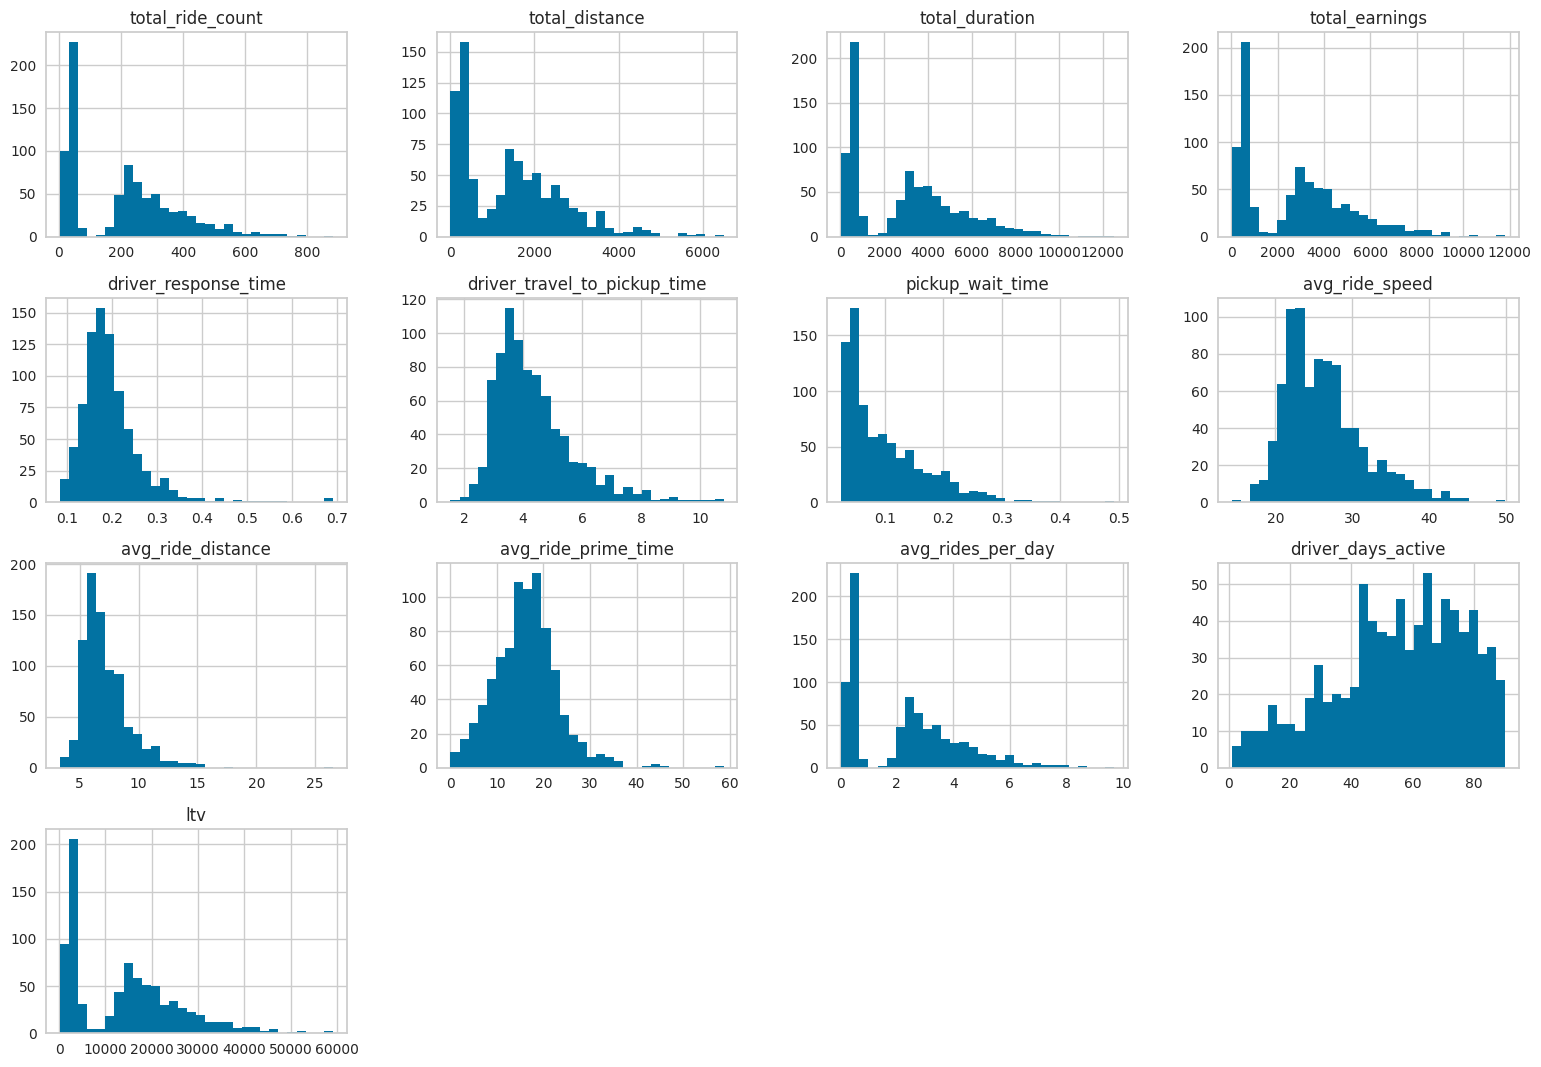

In [31]:
# Create a histogram of each numerical feature in the DataFrame
driver_df.hist(bins=30, figsize=(19, 13))

# Show the plot
plt.show()

In [32]:
# Display descriptive statistics
driver_df.describe().round(2)

,total_ride_count,total_distance,total_duration,total_earnings,driver_response_time,driver_travel_to_pickup_time,pickup_wait_time,avg_ride_speed,avg_ride_distance,avg_ride_prime_time,avg_rides_per_day,driver_days_active,ltv
count,837.00,837.00,837.00,837.00,837.00,837.00,837.00,837.00,837.00,837.00,837.00,837.00,837.00
mean,210.33,1457.65,3017.08,2847.26,0.20,4.36,0.10,26.27,7.21,16.29,2.31,55.06,14267.58
std,170.82,1202.39,2461.78,2314.50,0.07,1.35,0.07,5.16,2.13,6.93,1.88,21.74,11597.93
min,3.00,9.90,28.53,25.69,0.08,1.54,0.03,14.34,3.30,0.00,0.03,1.00,128.72
25%,42.00,316.48,607.75,584.81,0.16,3.43,0.04,22.48,5.85,11.86,0.46,42.00,2930.46
50%,215.00,1389.84,3021.82,2854.15,0.18,4.04,0.07,25.45,6.69,16.40,2.36,57.00,14302.10
75%,316.00,2192.31,4515.43,4283.40,0.22,4.96,0.14,28.71,8.10,20.05,3.47,73.00,21464.08
max,882.00,6488.60,12527.97,11797.57,0.69,10.80,0.49,49.80,26.52,58.72,9.69,90.00,59117.48


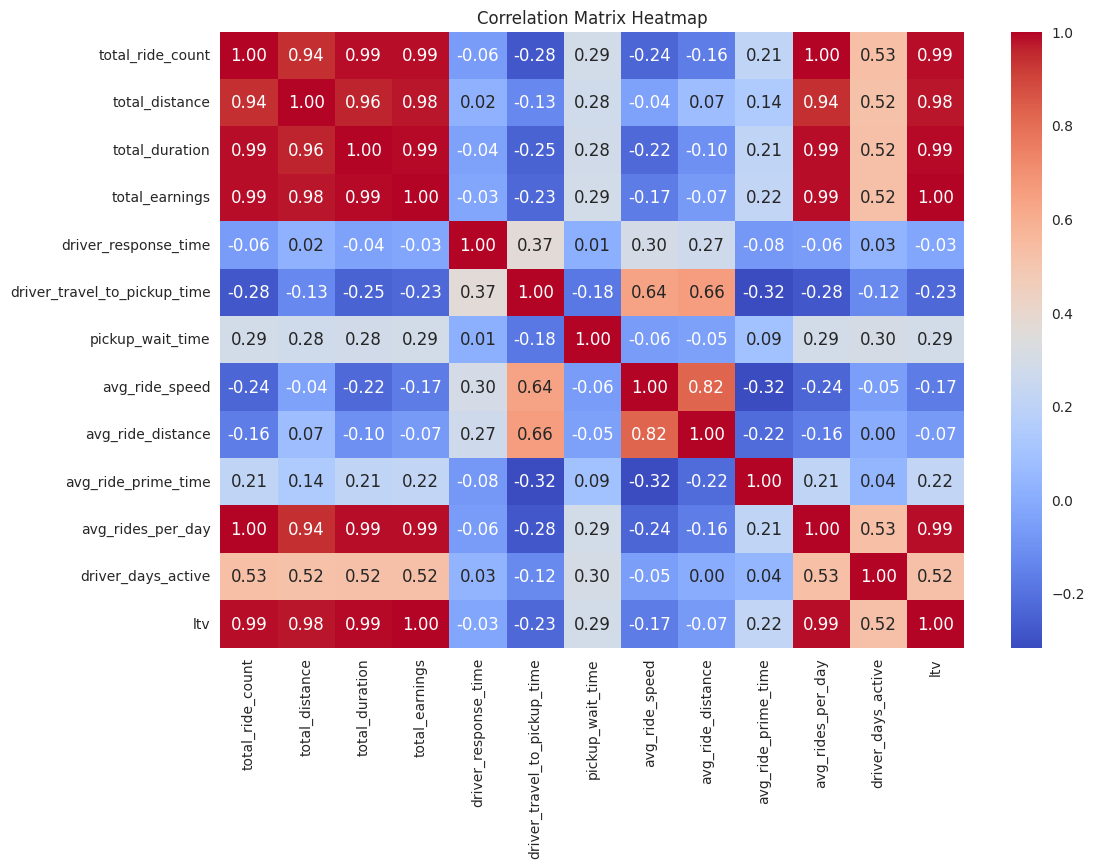

In [33]:
# Change the DataFrame's Index
driver_df = driver_df.set_index('driver_id')

# Calculate the correlation matrix
corr = driver_df.corr()

# Set up the visualization
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

# Add titles
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

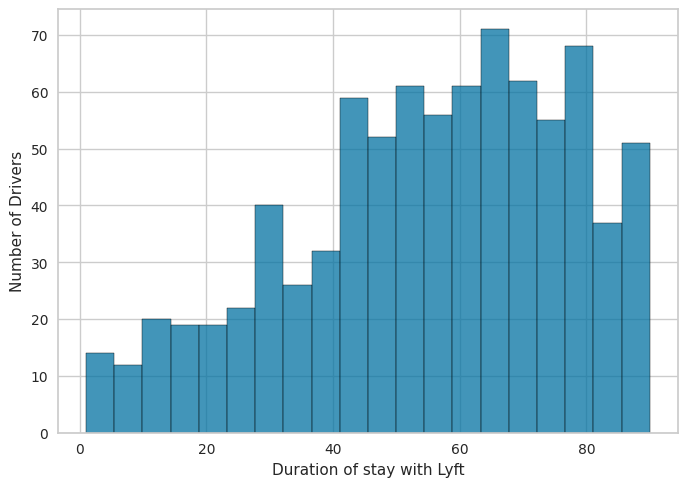

In [34]:
# Create a histogram of the driver days active
sns.histplot(data=driver_df, x="driver_days_active", bins=20)

# Set the x-axis label
plt.xlabel('Duration of stay with Lyft')

# Set the y-axis label
plt.ylabel('Number of Drivers')

# Show the plot
plt.show()

### 5. Clustering

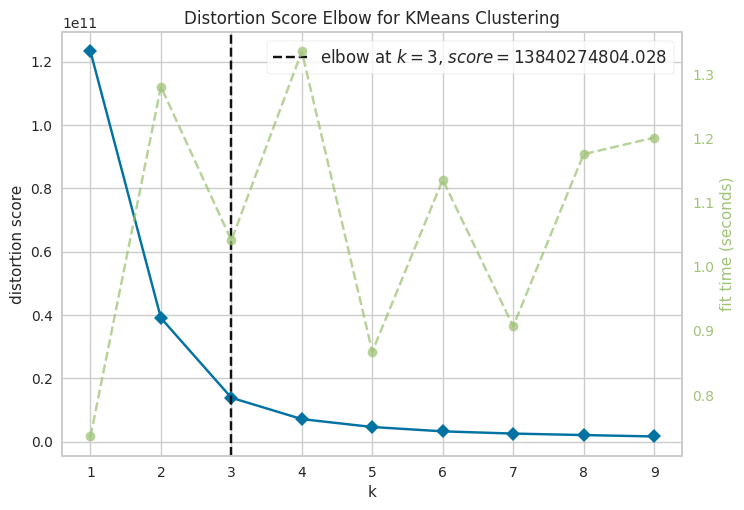

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Create a new DataFrame X by dropping the 'driver_id'
X = driver_df

# Initialize KMeans model
model = KMeans(init='k-means++', random_state=42)

# Initialize the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 10))

# Fit the visualizer
visualizer.fit(X)

# Display the visualization
visualizer.show()

In [36]:
# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_,
                init='k-means++', random_state=42)

# Fit the model
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [37]:
# Assign the cluster labels generated by KMeans to the 'cluster' column in driver_df
driver_df['cluster'] = kmeans.labels_

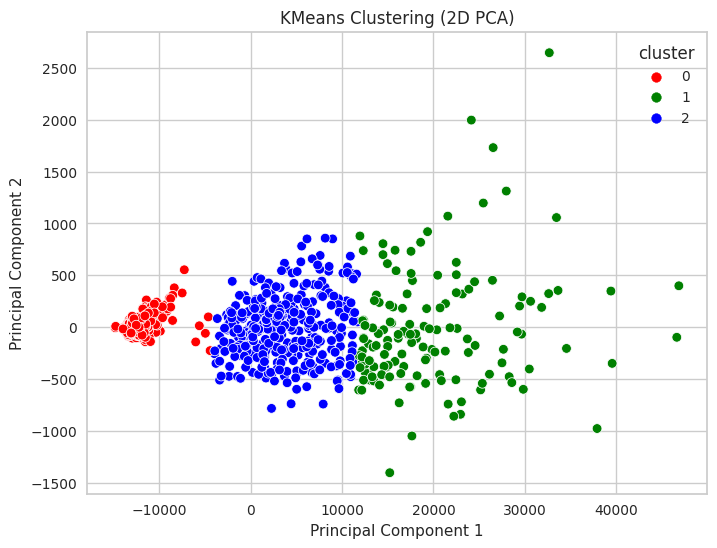

In [38]:
# Apply PCA to reduce the dimensionality of the data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define the color palette based on the cluster categories
cluster_palette = {0: 'red',
                   1: 'green',
                   2: 'blue'}

# Create a scatter plot of the 2D PCA-transformed data with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=driver_df['cluster'],
                palette=cluster_palette)
plt.title('KMeans Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

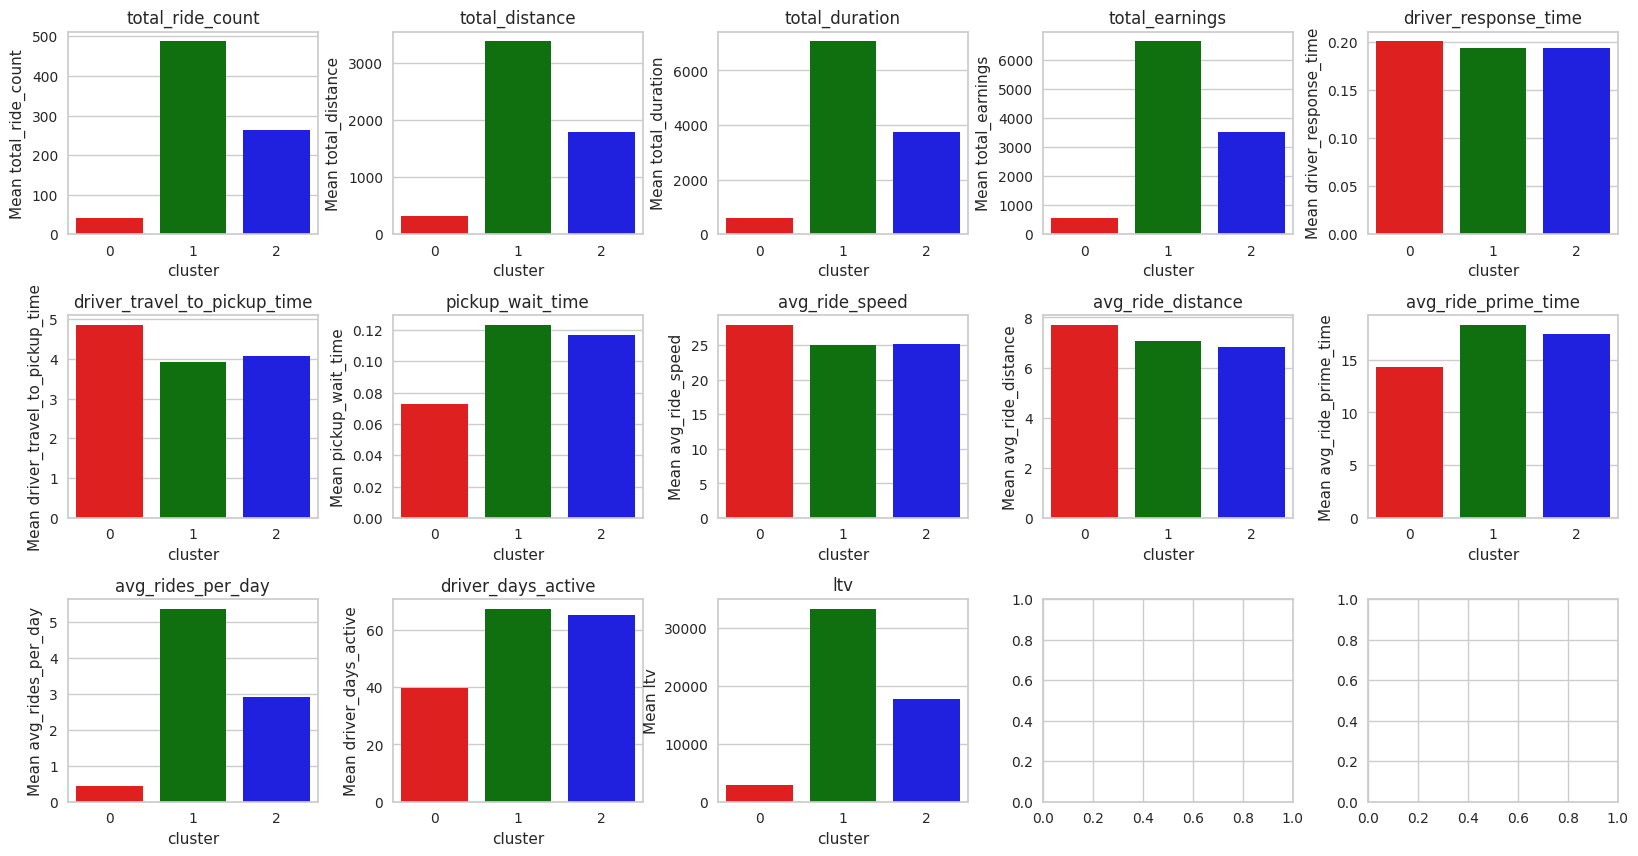

In [39]:
# Calculate means of features by cluster
grouped_df = driver_df.groupby(by='cluster')[['total_ride_count', 'total_distance', 'total_duration', 'total_earnings',
                                             'driver_response_time', 'driver_travel_to_pickup_time', 'pickup_wait_time', 'avg_ride_speed', 'avg_ride_distance', 'avg_ride_prime_time',
                                             'avg_rides_per_day', 'driver_days_active', 'ltv']].agg(func='mean')

# Create subplots for each column in grouped_df
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Loop over each column in grouped data frame and plot as subplot
for ax, (column, data) in zip(axes.flatten(), grouped_df.items()):
    sns.barplot(x=data.index, y=data, ax=ax, palette=cluster_palette.values())
    ax.set_title(column)
    ax.set_ylabel(f'Mean {column}')

# Show the plot
plt.show()

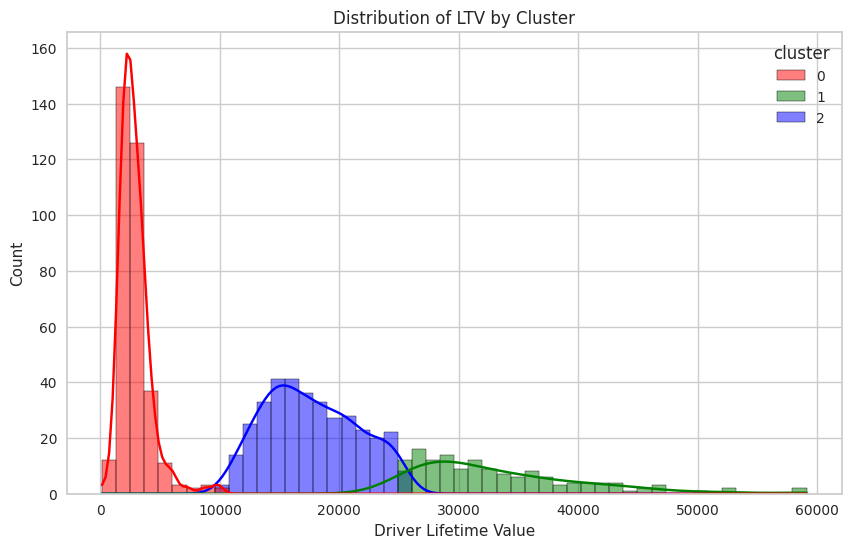

In [40]:
# Create a distribution plot with hue differentiation
plt.figure(figsize=(10, 6))
sns.histplot(data=driver_df, x='ltv',
             hue='cluster', kde=True,
             multiple="layer",
             bins=50,
             palette=list(cluster_palette.values()))
plt.title('Distribution of LTV by Cluster')
plt.xlabel('Driver Lifetime Value')
plt.ylabel('Count')
plt.show()

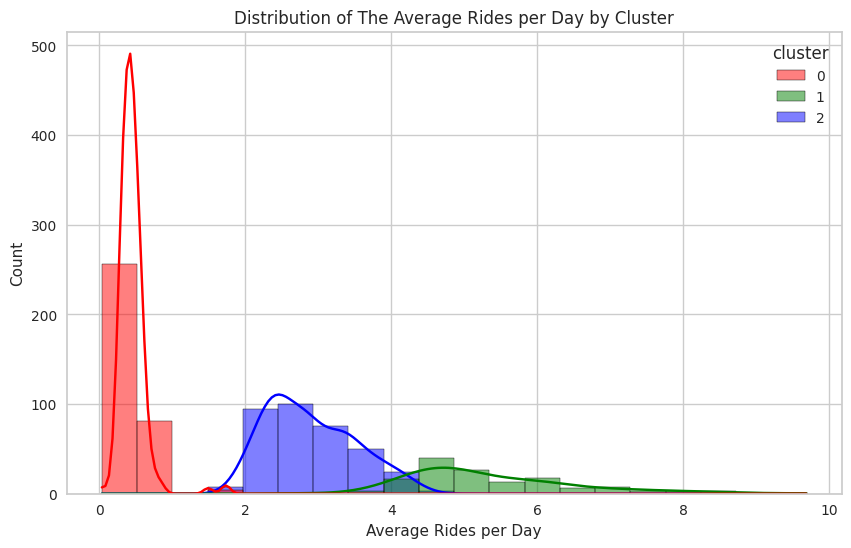

In [41]:
# Create a distribution plot with hue differentiation
plt.figure(figsize=(10, 6))
sns.histplot(data=driver_df, x='avg_rides_per_day',
             hue='cluster', kde=True,
             multiple="layer",
             bins=20,
             palette=list(cluster_palette.values()))
plt.title('Distribution of The Average Rides per Day by Cluster')
plt.xlabel('Average Rides per Day')
plt.ylabel('Count')
plt.show()

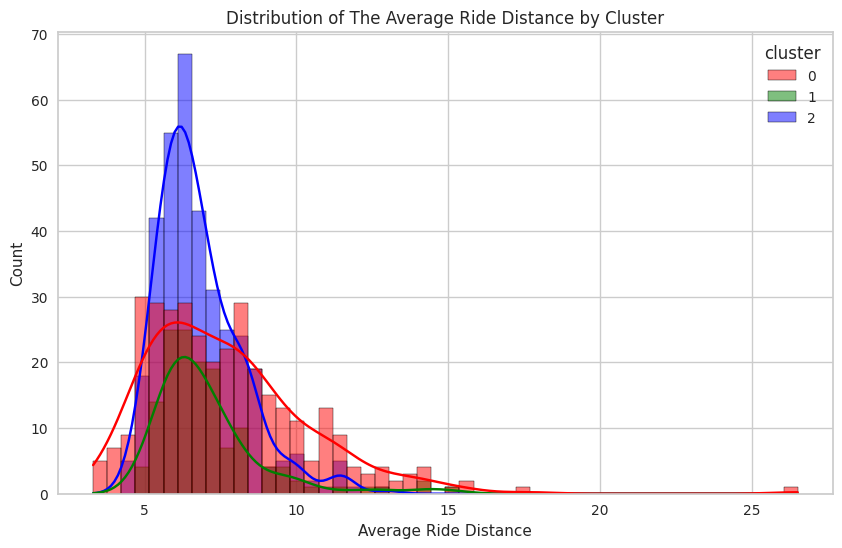

In [42]:
# Create a distribution plot with hue differentiation
plt.figure(figsize=(10, 6))
sns.histplot(data=driver_df, x='avg_ride_distance',
             hue='cluster', kde=True,
             multiple="layer",
             bins=50,
             palette=list(cluster_palette.values()))
plt.title('Distribution of The Average Ride Distance by Cluster')
plt.xlabel('Average Ride Distance')
plt.ylabel('Count')
plt.show()

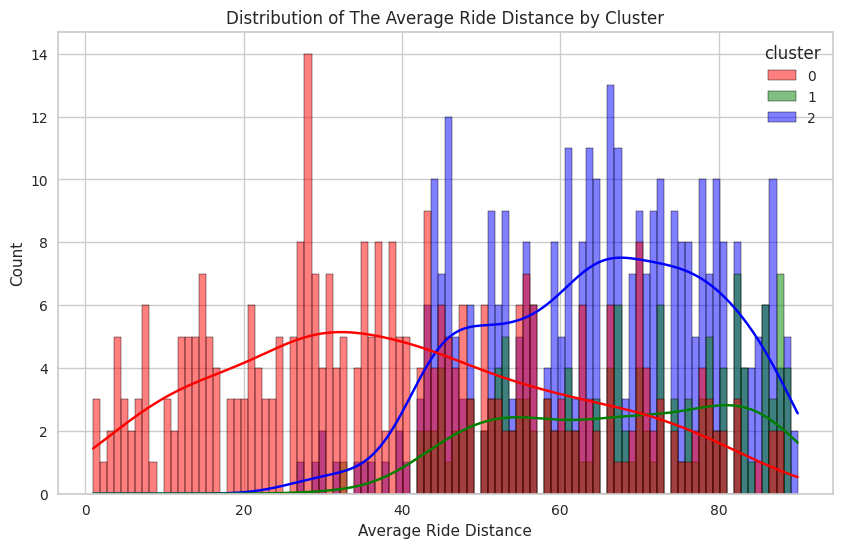

In [43]:
# Create a distribution plot with hue differentiation
plt.figure(figsize=(10, 6))
sns.histplot(data=driver_df, x='driver_days_active',
             hue='cluster', kde=True,
             multiple="layer",
             bins=100,
             palette=list(cluster_palette.values()))
plt.title('Distribution of The Average Ride Distance by Cluster')
plt.xlabel('Average Ride Distance')
plt.ylabel('Count')
plt.show()

<span style="color:red;">Cluster 0 is Below-Average Drivers:</span> Drivers in this cluster exhibit the lowest metrics in terms of total lifetime value, ride count, and overall duration and distance covered. Their performance could be hindered by negative customer feedback, infrequent bookings, or lower-than-average fares.

<span style="color:green;">Cluster 1 is Top-Performing Drivers:</span> Occupying the highest tier, these drivers outshine the rest with the greatest total lifetime value, the largest number of completed rides, and the longest durations and distances traveled. They likely enjoy a steady demand for their services and possess a strong reputation, which in turn bolsters their income.

<span style="color:blue;">Cluster 2 is Average Drivers:</span> This group is characterized by drivers with moderate performance across key metrics, including total lifetime value, number of rides, and the total time and distance on the job. While they may not attract the highest demand in the market, they maintain a stable performance without significant detriments to their earnings.

### Recommendations

Based on the driver information data analysis, here are some actionable recommendations to improve driver performance and business outcomes:

- **Retain Good and Excellent Drivers:** Prioritize retaining drivers in the good and excellent clusters. These drivers generate higher revenue and have more frequent rides, contributing significantly to the business.

- **Target Fair Driver Improvement:** Focus on improving the performance of fair drivers to convert them into good or excellent drivers. Provide targeted support and incentives to help them achieve this goal.

- **Address Issues Faced by Bad Drivers:** Identify and address the challenges faced by bad drivers, such as low earnings, infrequent rides, and short ride durations. Implement measures to help them overcome these obstacles and improve their performance.

- **Offer Personalized Incentives and Training:** Tailor incentives and training programs based on driver performance clusters. This personalized approach can further enhance driver performance and satisfaction.

- **Utilize Clustering Results for Dynamic Pricing:** Leverage the clustering results to implement dynamic pricing strategies. Adjust prices based on the supply and demand of drivers in specific areas to optimize revenue and improve driver utilization.

- **Regular Performance Monitoring:** Continuously monitor driver performance and reassess them based on the clustering results. This ongoing evaluation ensures that drivers receive the appropriate level of support and incentives to maintain or improve their performance.